In [96]:
#importing modules
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [97]:
#importing digit dataset

from keras.datasets import mnist
(x_train1, y_train1), (x_test1, y_test1) = mnist.load_data()

In [98]:
print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)
print(y_test1.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [99]:
#reducing size of mnist data set
x_train1 = x_train1[:15000]
y_train1 = y_train1[:15000]
x_test1 = x_test1[:2000]
y_test1 = y_test1[:2000]


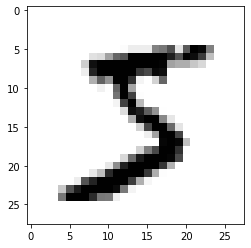

In [100]:
plt.imshow(x_train1[0], cmap=plt.cm.binary)

In [101]:
print(x_train1[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [102]:
#importing alphabet data set
data = pd.read_csv("A_Z Handwirtten DataSet.csv")
print(data.shape)

(28600, 785)


In [103]:
print(data.head())

    0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0   8    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1   5    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2   7    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3   3    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  14    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [104]:
#Split data into images and their labels:

X = data.drop('0',axis = 1)        #contains images
Y = data['0']                      #contains label

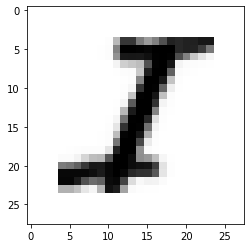

In [105]:
#displaying first alphabet
x = np.array(X.head(1))
x = np.reshape(x,(28,28))
plt.imshow(x, cmap=plt.cm.binary)

In [106]:
#train_test data for letter dataset

from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, train_size=0.7)

In [107]:
#convert into array
x_train2 = np.array(x_train2)
y_train2 = np.array(y_train2)
x_test2 = np.array(x_test2)
y_test2 = np.array(y_test2)

In [108]:
#normalizing pixel value between 0 and 1

#digit data
x_train1 = x_train1/255.0 
x_test1 =  x_test1/255.0

#letter data
x_train2 = x_train2/255.0 
x_test2 =  x_test2/255.0

In [109]:
#resizing the image to input it into convolution layer

#digit data
x_train1 = np.array(x_train1).reshape(-1,28,28,1)
x_test1 = np.array(x_test1).reshape(-1,28,28,1)

#alphabet data
x_train2 = np.array(x_train2).reshape(-1,28,28,1)
x_test2 = np.array(x_test2).reshape(-1,28,28,1)

In [110]:
#increasing value by 10 to diffrentiate digit value and letter values
y_train2 = y_train2 + 10
y_test2 = y_test2 + 10

#concatinating train test data
x_train = np.concatenate((x_train1, x_train2), axis=0)
x_test = np.concatenate((x_test1, x_test2), axis=0)
y_train = np.concatenate((y_train1, y_train2), axis=0)
y_test = np.concatenate((y_test1, y_test2), axis=0)

In [111]:
#designing neural network

from tensorflow.keras import models,layers
model = models.Sequential()
# 1 convolutional layer
model.add(layers.Conv2D(64,(3,3), activation = 'relu' , input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))          

#2 convolutional layer
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))         
          
#3 convolutional layer
model.add(layers.Conv2D(32,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))         
 

          
# dense layer

model.add(layers.Flatten())
model.add(layers.Dense(64 ,activation = 'relu')) 
model.add(layers.Dense(64 ,activation = 'relu'))  
model.add(layers.Dense(36 ,activation = 'softmax'))

          




In [112]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 1, 1, 32)       

In [113]:
model.compile(optimizer='adam', loss = "SparseCategoricalCrossentropy" ,metrics=['accuracy'])

In [114]:
model.fit(x_train,y_train,epochs = 4,validation_data=(x_test, y_test))

Epoch 1/4
1095/1095 [==============================] - 33s 30ms/step - loss: 1.1653 - accuracy: 0.6532 - val_loss: 0.6905 - val_accuracy: 0.7882
Epoch 2/4
1095/1095 [==============================] - 34s 31ms/step - loss: 0.4612 - accuracy: 0.8529 - val_loss: 0.4087 - val_accuracy: 0.8763
Epoch 3/4
1095/1095 [==============================] - 34s 31ms/step - loss: 0.3453 - accuracy: 0.8891 - val_loss: 0.4386 - val_accuracy: 0.8662
Epoch 4/4
1095/1095 [==============================] - 34s 31ms/step - loss: 0.2868 - accuracy: 0.9055 - val_loss: 0.3002 - val_accuracy: 0.9038


In [141]:
import cv2

img = cv2.imread('img.png')

type(img)
img = np.array(img)

img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28),interpolation = cv2.INTER_AREA)

img = img.reshape(1,28,28,1)
img = img/255.0

value = np.argmax(model.predict(img))
if(value>9):
    print(chr(value+55))
else:
    print(value)

C
